In [1]:
###Analisis Descriptivo ##
##Se incluirán gráficos relevantes para las variables categóricas y cuantitativas.##

In [2]:
pip install dash plotly


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpuNote: you may need to restart the kernel to use updated packages.



In [4]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

In [7]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install textblob googletrans==4.0.0-rc1

In [9]:
pip install rapidfuzz

Note: you may need to restart the kernel to use updated packages.


In [10]:
!pip install textblob

In [11]:
# -------------------------------
# Importación de librerías necesarias
# -------------------------------

# Librerías de análisis y procesamiento de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Procesamiento de texto (NLP)
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from transformers import pipeline
from rapidfuzz import process, fuzz

# Clustering y Preprocesamiento
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage

# Dash (Dashboard interactivo)
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

C:\Users\USER\AppData\Local\Temp\ipykernel_4140\58478144.py:35: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\USER\AppData\Local\Temp\ipykernel_4140\58478144.py:36: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [12]:
# Descargar recursos necesarios de NLTK
nltk.download('punkt')  # Tokenizador
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')  # Lemmatizer
nltk.download('omw-1.4')  # Recurso adicional para lemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
# Configuración de visualización
sns.set(style="whitegrid")

In [14]:
# Cargar el dataset
data = pd.read_csv("Dirty_Evaluation_Data.csv")

In [15]:
# Información general del dataset
print("\n\n=== Información General del Dataset ===\n")
data.info()



=== Información General del Dataset ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Id Instructor                 7824 non-null   float64
 1   Grado Académico               7784 non-null   object 
 2   Catálogo                      7784 non-null   object 
 3   Curso                         7831 non-null   float64
 4   Nº Clase                      7838 non-null   float64
 5   Nombre Catalogo               7784 non-null   object 
 6   Modo de Enseñanza             7784 non-null   object 
 7   Fecha Inicio real             7784 non-null   object 
 8   Fecha Fin real                7784 non-null   object 
 9   Centro de Costos              7784 non-null   object 
 10  Nota final por curso          7831 non-null   float64
 11  Competencia Evaluada          7784 non-null   object 
 12  Nota competencia po

In [16]:
# Estadísticas descriptivas
print("\n\n=== Estadísticas Descriptivas ===\n")
print(data.describe(include='all'))



=== Estadísticas Descriptivas ===

        Id Instructor Grado Académico    Catálogo         Curso      Nº Clase  \
count    7.824000e+03            7784        7784  7.831000e+03   7838.000000   
unique            NaN              55        1106           NaN           NaN   
top               NaN            PREG      HL0555           NaN           NaN   
freq              NaN            6400         221           NaN           NaN   
mean     1.497232e+09             NaN         NaN  1.840185e+05   6169.923833   
std      2.056527e+09             NaN         NaN  2.739040e+05  14220.254748   
min      1.000000e+09             NaN         NaN  1.098000e+05   1258.000000   
25%      1.000060e+09             NaN         NaN  1.099600e+05   1421.000000   
50%      1.000089e+09             NaN         NaN  1.157130e+05   1517.000000   
75%      1.000125e+09             NaN         NaN  1.256200e+05   5272.750000   
max      1.000363e+10             NaN         NaN  1.317080e+06  64620.0

In [17]:
# Visualizar las primeras filas del dataset
print("\n\n=== Primeras Filas del Dataset ===\n")
print(data.head())



=== Primeras Filas del Dataset ===

   Id Instructor Grado Académico    Catálogo      Curso  Nº Clase  \
0   1.000096e+09            PREG      PS0301        NaN       NaN   
1   1.000096e+09            PREG      PS0301        NaN    1383.0   
2   1.000096e+09            PREG         NaN  1317080.0    1383.0   
3            NaN            PREG      PS0302   125596.0    1384.0   
4   1.000005e+09            PREG      PS0302   125596.0    1384.0   

                 Nombre Catalogo Modo de Enseñanza Fecha Inicio real  \
0                            NaN        Presencial        2024-01-24   
1  Análisis Descriptivo de Datos        Pcsaielenr               NaN   
2                            NaN        Presencial        2024-01-24   
3     El Objeto de la Psicología        Presencial               NaN   
4     El Objeto de la Psicología        Presencial        2024-01-22   

  Fecha Fin real      Centro de Costos  Nota final por curso  \
0     2024-05-22  Depto. de Psicología            

In [18]:
# Verificar valores nulos por columna
print("\n\n=== Valores Nulos por Columna ===\n")
null_counts = data.isnull().sum()
null_percent = (data.isnull().mean() * 100).round(2)
nulls = pd.DataFrame({"Valores Nulos": null_counts, "Porcentaje (%)": null_percent})
print(nulls)



=== Valores Nulos por Columna ===

                              Valores Nulos  Porcentaje (%)
Id Instructor                           825            9.54
Grado Académico                         865           10.00
Catálogo                                865           10.00
Curso                                   818            9.46
Nº Clase                                811            9.38
Nombre Catalogo                         865           10.00
Modo de Enseñanza                       865           10.00
Fecha Inicio real                       865           10.00
Fecha Fin real                          865           10.00
Centro de Costos                        865           10.00
Nota final por curso                    818            9.46
Competencia Evaluada                    865           10.00
Nota competencia por clase              824            9.53
Nota final por clase                    823            9.52
Pregunta                                865           10.00
Cal

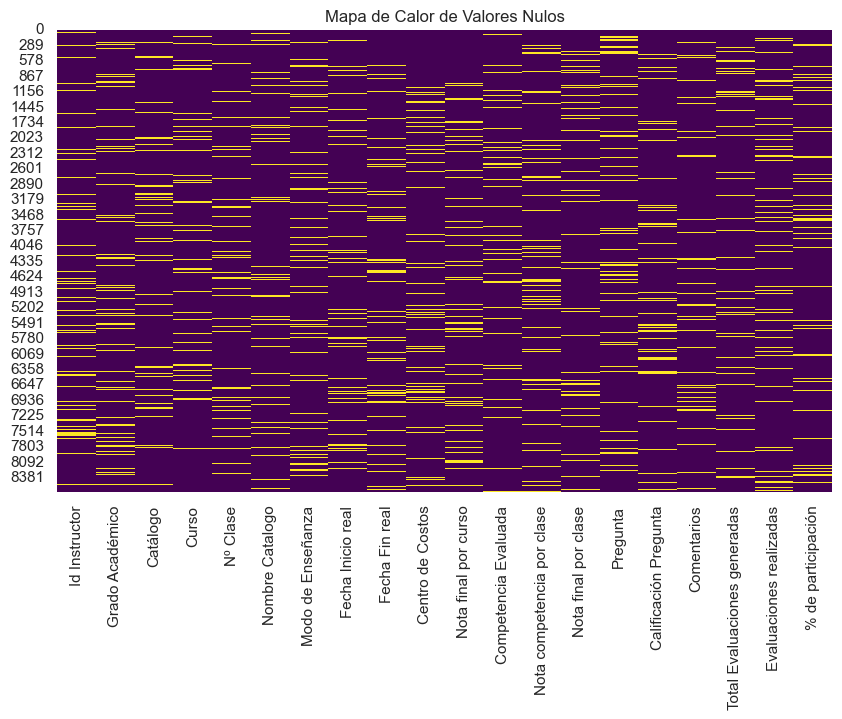

In [19]:
# Visualización de la distribución de valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Calor de Valores Nulos")
plt.show()

In [20]:
#Reprocesamiento Voy hacer arreglos necesarios que vi pertintentes en algunas variables

In [21]:
# Definir columnas afectadas con formato esperado
columnas_a_corregir = {
    'Id Instructor': 10,                 # Debe tener exactamente 10 dígitos
    'Curso': 6,                          # Debe tener 6 dígitos
    'Nº Clase': 4,                       # Debe tener 5 dígitos
    'Nota final por curso': 'nota',      # Notas deben ser tipo decimal
    'Nota final por clase': 'nota',      # Notas deben ser tipo decimal
    'Total Evaluaciones generadas': 4,   # Máximo 4 dígitos
    'Evaluaciones realizadas': 4,        # Máximo 4 dígitos
    '% de participación': 'porcentaje'  # Porcentajes deben estar entre 0 y 100
}

In [22]:
# Función para corregir valores mal formateados
def corregir_valor(valor, formato):
    try:
        if pd.isna(valor):  # Si es NaN, no lo tocamos
            return valor
        if formato == 'nota':  # Corregir notas mal formateadas como 50 -> 5.0
            valor = float(valor)
            return valor / 10 if valor > 10 else valor
        elif formato == 'porcentaje':  # Asegurar que el porcentaje esté entre 0 y 100
            return float(valor) if 0 <= float(valor) <= 100 else np.nan
        else:  # Para truncar según el número de dígitos especificado
            valor_str = str(int(valor))  # Convertir a entero y luego a cadena
            return int(valor_str[:formato]) if len(valor_str) > formato else int(valor_str)
    except:
        return np.nan  # En caso de error, devolver NaN

In [23]:
# Aplicar correcciones a las columnas afectadas
for columna, formato in columnas_a_corregir.items():
    data[columna] = data[columna].apply(lambda x: corregir_valor(x, formato))

In [24]:
#ajustes en variables categoricas


In [25]:
# Definir las categorías válidas para las columnas restantes
categorias_validas = {
    'Modo de Enseñanza': ['Presencial', 'Virtual Formal'],
    'Grado Académico': ['PREG', 'DOCT', 'MSTR']
}

In [26]:
# Función para eliminar espacios vacíos dentro de las respuestas
def eliminar_espacios(valor):
    if pd.isna(valor):  # Si el valor es NaN, no lo procesamos
        return valor
    return " ".join(str(valor).split())  # Elimina espacios múltiples y alrededor

In [27]:
# Función para corregir las categorías utilizando fuzzy matching
def corregir_categorias(valor, categorias):
    if pd.isna(valor):  # Si el valor es NaN, no lo procesamos
        return valor
    
    valor_normalizado = str(valor).strip().upper()  # Normalizamos el texto y lo pasamos a mayúsculas
    
    # Usar fuzzy matching para encontrar el mejor match
    mejor_match = process.extractOne(valor_normalizado, categorias)
    
    # Si se encontró un match, devuelve la categoría correspondiente
    if mejor_match:
        return mejor_match[0]  # Devuelve el valor del mejor match
    
    return valor  # Si no hay match, devuelve el valor original

In [28]:
# Aplicar eliminación de espacios a las columnas categóricas
columnas_categoricas = ['Modo de Enseñanza', 'Grado Académico']
for columna in columnas_categoricas:
    data[columna] = data[columna].apply(eliminar_espacios)

In [29]:
from rapidfuzz import process

In [30]:
# Corregir las categorías para "Grado Académico"
data['Grado Académico'] = data['Grado Académico'].apply(lambda x: corregir_categorias(x, categorias_validas['Grado Académico']))

In [31]:
# Corregir las categorías para "Modo de Enseñanza"
data['Modo de Enseñanza'] = data['Modo de Enseñanza'].apply(lambda x: corregir_categorias(x, categorias_validas['Modo de Enseñanza']))

In [32]:
# Función para limpiar la columna Catálogo
def limpiar_catalogo(valor):
    if pd.isna(valor):  # Si el valor es NaN, no lo procesamos
        return valor
    # Eliminar todos los espacios en blanco
    valor_limpio = "".join(str(valor).split())  
    return valor_limpio

In [33]:
# Aplicar la limpieza a la columna 'Catálogo'
data['Catálogo'] = data['Catálogo'].apply(limpiar_catalogo)

In [34]:
# Función para organizar la columna 'Catálogo' a 6 caracteres: dos letras seguidas de 4 números
def organizar_catalogo(valor):
    if pd.isna(valor):  # Si el valor es NaN, no lo procesamos
        return valor
    # Eliminar todos los espacios en blanco
    valor = "".join(str(valor).split())
    
    # Separar las letras y los números
    letras = "".join([c for c in valor if c.isalpha()])  # Extraer letras
    numeros = "".join([c for c in valor if c.isdigit()])  # Extraer números
    
    # Asegurarse de que hay al menos 2 letras y 4 números
    letras = letras[:2]  # Tomar solo las primeras dos letras
    numeros = numeros[:4]  # Tomar solo los primeros 4 números
    
    # Concatenar las letras y números asegurando que siempre sean 6 caracteres
    catalogo_organizado = letras + numeros
    return catalogo_organizado

# Aplicar la organización a la columna 'Catálogo'
data['Catálogo'] = data['Catálogo'].apply(organizar_catalogo)
  

In [35]:
# Definir las categorías o nombres correctos para los catálogos
categorias_catalogo = ['Psicología General I', 'Matemáticas II', 'Biología Molecular', 'Química Orgánica']

# Función para corregir las palabras mal ordenadas en el catálogo
def corregir_catalogo(valor, categorias):
    if pd.isna(valor):  # Si el valor es NaN, no lo procesamos
        return valor
    
    valor_normalizado = str(valor).strip().lower()  # Normalizamos el texto y lo pasamos a minúsculas
    # Usamos fuzzy matching para encontrar el mejor match
    mejor_match = process.extractOne(valor_normalizado, categorias, scorer=fuzz.ratio)
    
    # `mejor_match` ahora es una tupla (mejor_match, score), así que accedemos al primer valor
    return mejor_match[0] if mejor_match else valor  # Si no hay match, devolvemos el valor original


In [36]:
# Aplicar la corrección a la columna 'Nombre Catalogo'
data['Nombre Catalogo'] = data['Nombre Catalogo'].apply(lambda x: corregir_catalogo(x, categorias_catalogo))

In [37]:
# Definir las categorías correctas para "Centro de Costos"
categorias_centros_costos = ['Psicología', 'Matemáticas', 'Biología', 'Química', 'Física', 'Administración', 'Derecho', 'Ingeniería', 'Comunicación']

In [38]:
# Función para corregir las palabras mal ordenadas en el "Centro de Costos"
def corregir_centro_costos(valor, categorias):
    if pd.isna(valor):  # Si el valor es NaN, no lo procesamos
        return valor
    
    valor_normalizado = str(valor).strip().lower()  # Normalizamos el texto y lo pasamos a minúsculas
    # Usamos fuzzy matching para encontrar el mejor match
    resultado = process.extractOne(valor_normalizado, categorias, scorer=fuzz.ratio)
    
    # Si se encuentra un match, devolvemos el mejor match
    if resultado:
        mejor_match = resultado[0]
        return mejor_match
    return valor  # Si no hay match, devolvemos el valor original


In [39]:
# Aplicar la corrección a la columna 'Centro de Costos'
data['Centro de Costos'] = data['Centro de Costos'].apply(lambda x: corregir_centro_costos(x, categorias_centros_costos))

In [40]:
# Definir las categorías correctas para la columna 'Pregunta'
categorias_pregunta = [
    'Menciona un aspecto a mejorar del desempeño de tu profe en el aula',
    '¿Tienes algún comentario adicional de tu profe o del curso?'
]

In [41]:
# Función para corregir las palabras mal ordenadas en la columna 'Pregunta'
def corregir_pregunta(valor, categorias):
    if pd.isna(valor):  # Si el valor es NaN, no lo procesamos
        return valor
    
    valor_normalizado = str(valor).strip().lower()  # Normalizamos el texto y lo pasamos a minúsculas
    # Usamos fuzzy matching para encontrar el mejor match
    resultado = process.extractOne(valor_normalizado, categorias, scorer=fuzz.ratio)
    
    # Si se encuentra un match, devolvemos el mejor match
    if resultado:
        mejor_match = resultado[0]
        return mejor_match
    return valor  # Si no hay match, devolvemos el valor original

In [42]:
# Aplicar la corrección a la columna 'Pregunta'
data['Pregunta'] = data['Pregunta'].apply(lambda x: corregir_pregunta(x, categorias_pregunta))

In [43]:
# Eliminar la columna 'Comentarios' NO veo como sume para el analisis
data = data.drop(columns=['Competencia Evaluada'])

In [44]:
# Limpieza de datos categóricos
def clean_categorical_column(column):
    return column.str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True).fillna("desconocido")

if 'Modo de Enseñanza' in data.columns:
    data['Modo de Enseñanza'] = clean_categorical_column(data['Modo de Enseñanza'])
if 'Centro de Costos' in data.columns:
    
    data['Centro de Costos'] = clean_categorical_column(data['Centro de Costos'])

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


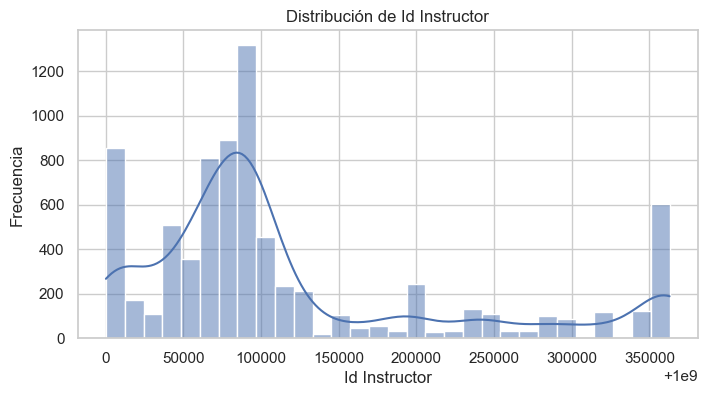

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


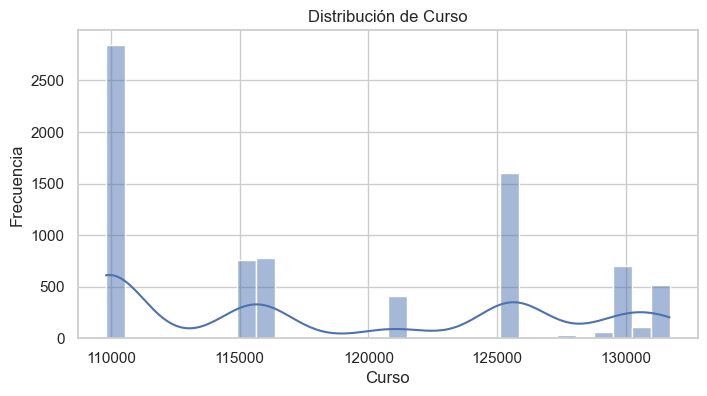

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


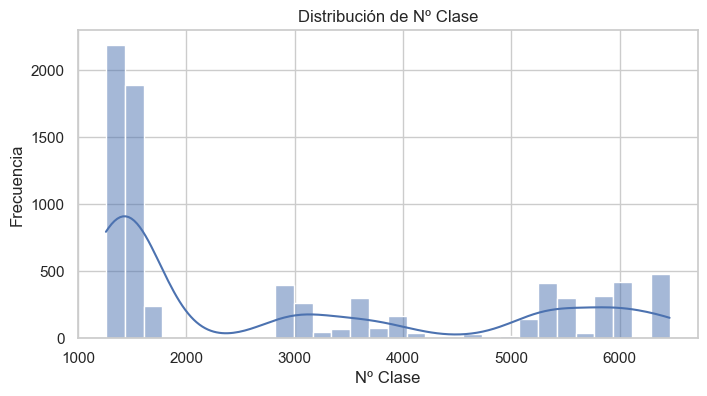

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


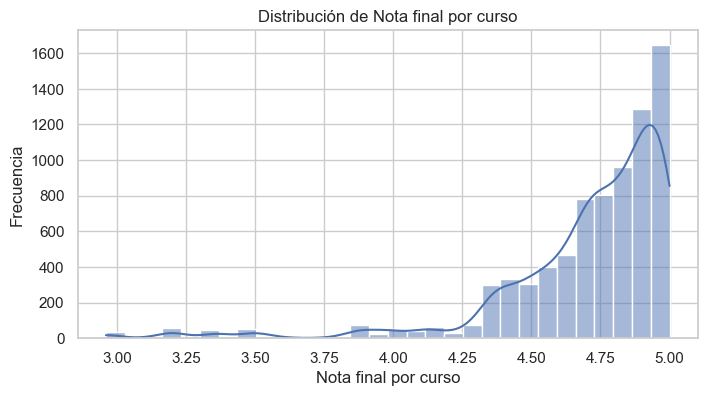

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


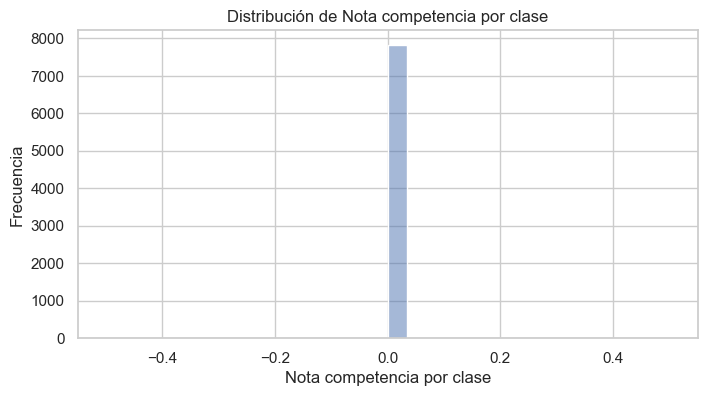

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


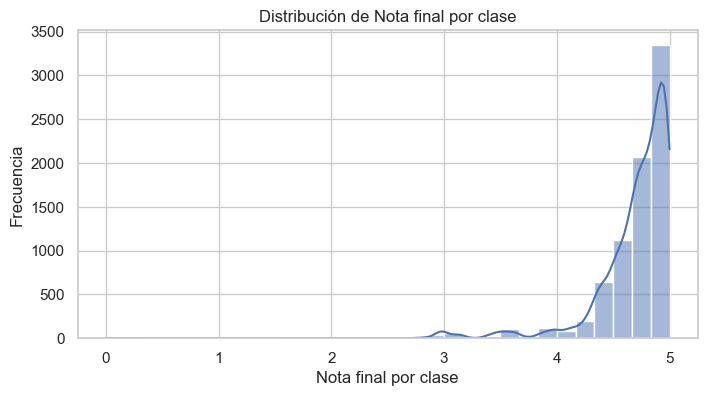

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


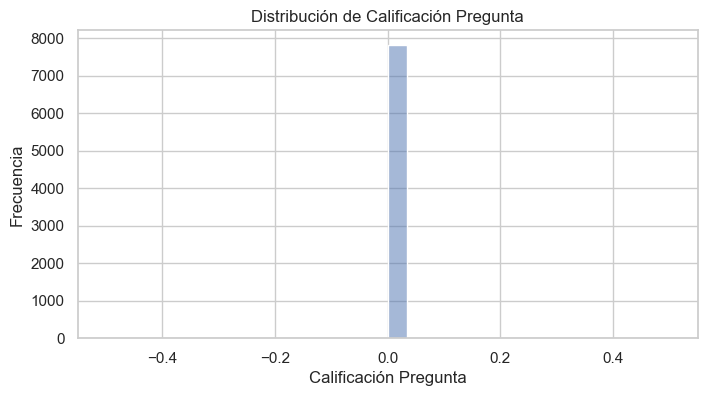

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


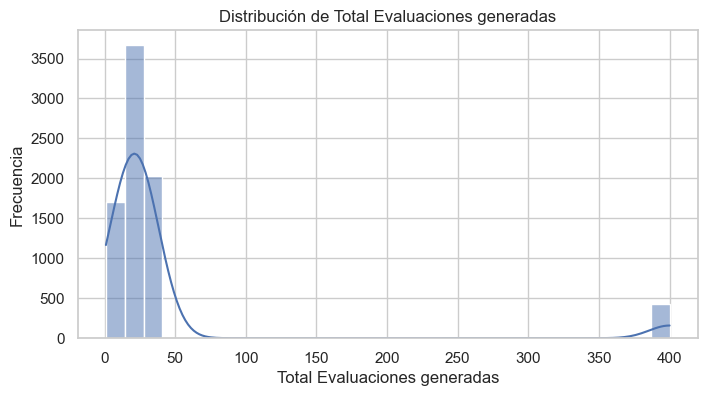

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


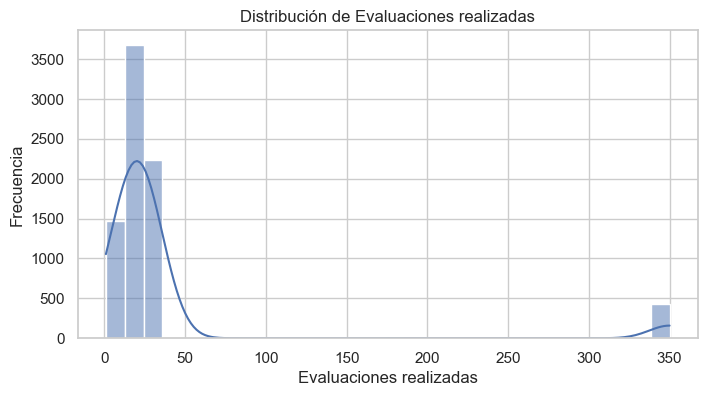

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


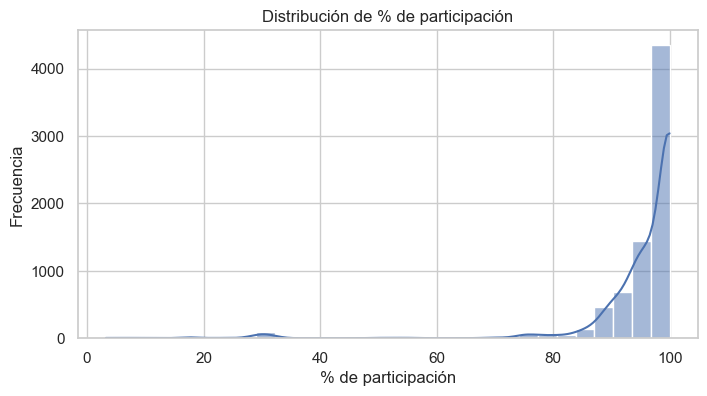

In [45]:
# Visualizar distribuciones de variables numéricas
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


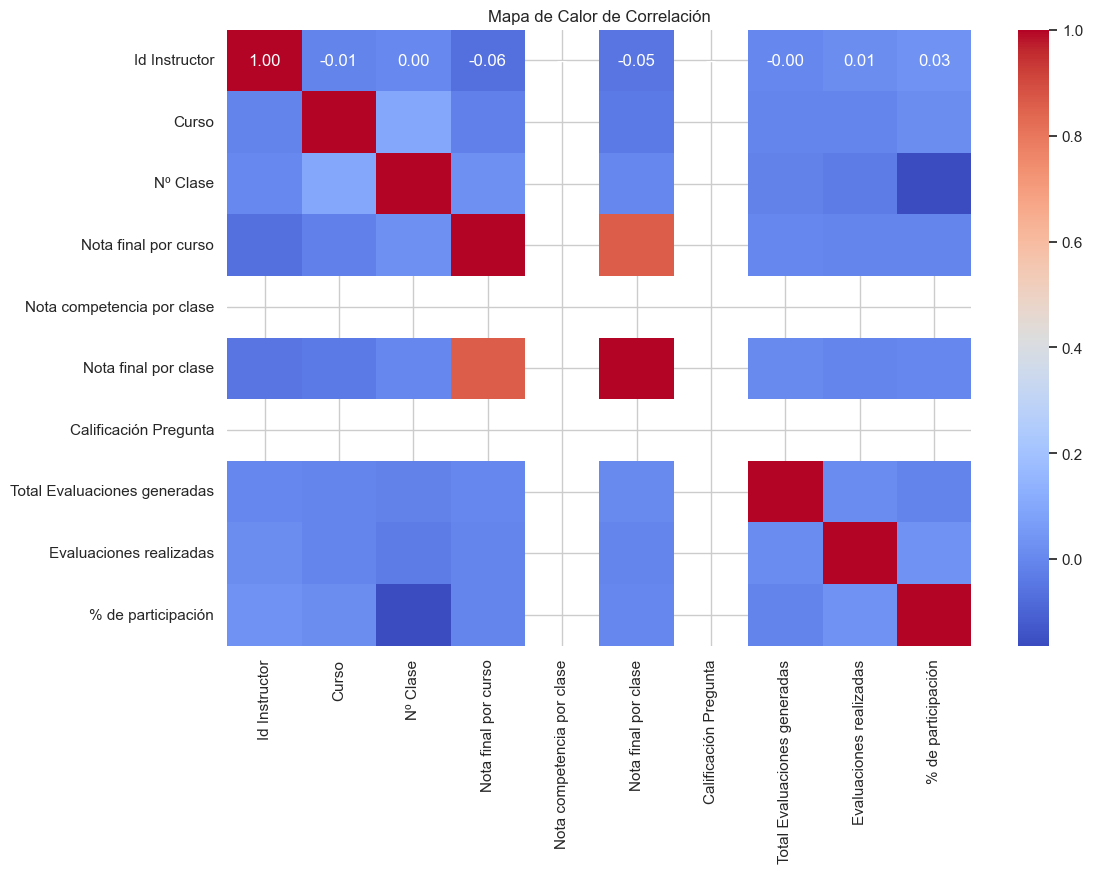

In [46]:
# Verificar correlaciones entre variables numéricas
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()

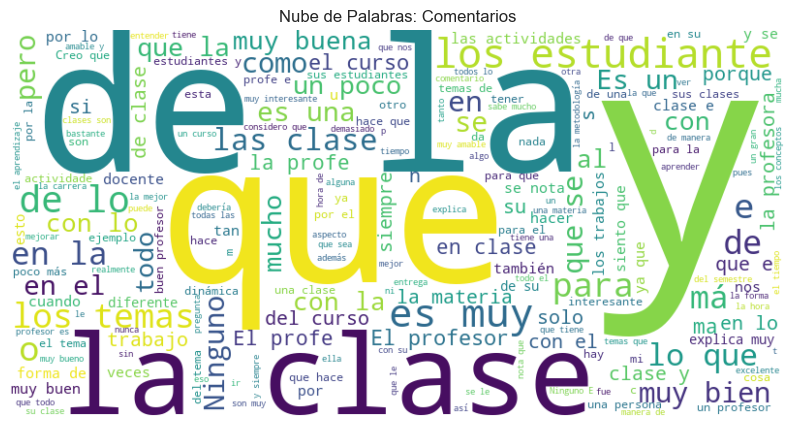

In [47]:
# Análisis de palabras clave en comentarios
if 'Comentarios' in data.columns:
    text_data = " ".join(data['Comentarios'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de Palabras: Comentarios")
    plt.show()

In [48]:
# Llenar los valores NaN con la moda de cada columna, para eficiencia del analisis , veo que es un 10% por columna y veo que lo puedo realzair asi
for columna in data.columns:
    moda = data[columna].mode()[0]  # Obtener la moda de la columna
    data[columna] = data[columna].fillna(moda)  # Rellenar NaN con la moda

In [49]:
# Eliminar valores nulos en la columna de comentarios (asumiendo que se llama 'Comentarios')
data = data.dropna(subset=['Comentarios'])

In [50]:
# Función para limpiar texto
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = re.sub(r'\s+', ' ', text)  # Eliminar espacios múltiples
    return text

In [51]:
# Aplicar limpieza de texto
data['Comentarios_limpios'] = data['Comentarios'].apply(clean_text)

In [52]:
# Eliminar stopwords
stop_words = set(stopwords.words('spanish'))
data['Comentarios_tokenizados'] = data['Comentarios_limpios'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words])
)

print(data[['Comentarios', 'Comentarios_limpios', 'Comentarios_tokenizados']].head())

                                         Comentarios  \
0                           la practica de los temas   
1                            No sé en ocurre ninguna   
2  Su buen sentido del humor a veces facilita la ...   
3                retroalimentar al final de la clase   
4  Podría evaluar la forma de dictar la clase par...   

                                 Comentarios_limpios  \
0                           la practica de los temas   
1                            no sé en ocurre ninguna   
2  su buen sentido del humor a veces facilita la ...   
3                retroalimentar al final de la clase   
4  podría evaluar la forma de dictar la clase par...   

                             Comentarios_tokenizados  
0                                     practica temas  
1                                  sé ocurre ninguna  
2         buen humor veces facilita compresión temas  
3                         retroalimentar final clase  
4  podría evaluar forma dictar clase hacerla tan ..

In [53]:
# Función para analizar el sentimiento
def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    if polaridad > 0:
        return "positivo"
    elif polaridad < 0:
        return "negativo"
    else:
        return "neutro"

In [54]:
# Cambia 'Comentarios_limpios' por el nombre de la columna que deseas usar para el análisis
data['sentimiento'] = data['Comentarios_limpios'].apply(analizar_sentimiento)

In [55]:
print(data[['Comentarios', 'sentimiento']].head())

                                         Comentarios sentimiento
0                           la practica de los temas      neutro
1                            No sé en ocurre ninguna      neutro
2  Su buen sentido del humor a veces facilita la ...      neutro
3                retroalimentar al final de la clase      neutro
4  Podría evaluar la forma de dictar la clase par...      neutro


In [56]:
print(data['sentimiento'].value_counts())

sentimiento
neutro      8415
positivo     204
negativo      30
Name: count, dtype: int64


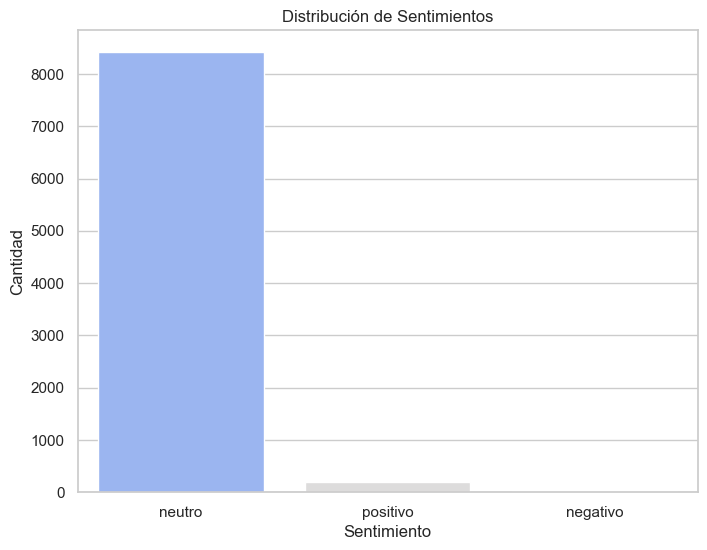

In [57]:
# Gráfico de barras para la distribución de sentimientos
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimiento', data=data, palette='coolwarm')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

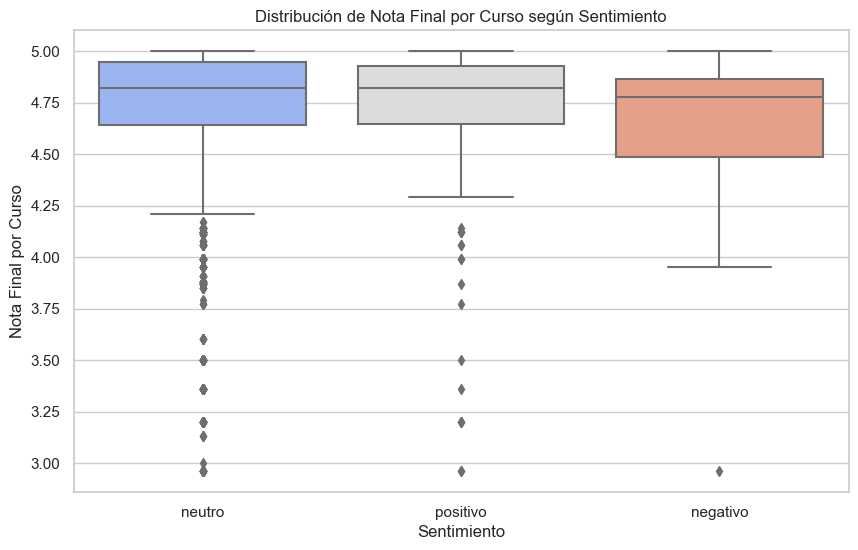

In [58]:
# Gráfico de dispersión para ver cómo la 'Nota final por curso' se relaciona con los sentimientos
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentimiento', y='Nota final por curso', data=data, palette='coolwarm')
plt.title('Distribución de Nota Final por Curso según Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Nota Final por Curso')
plt.show()

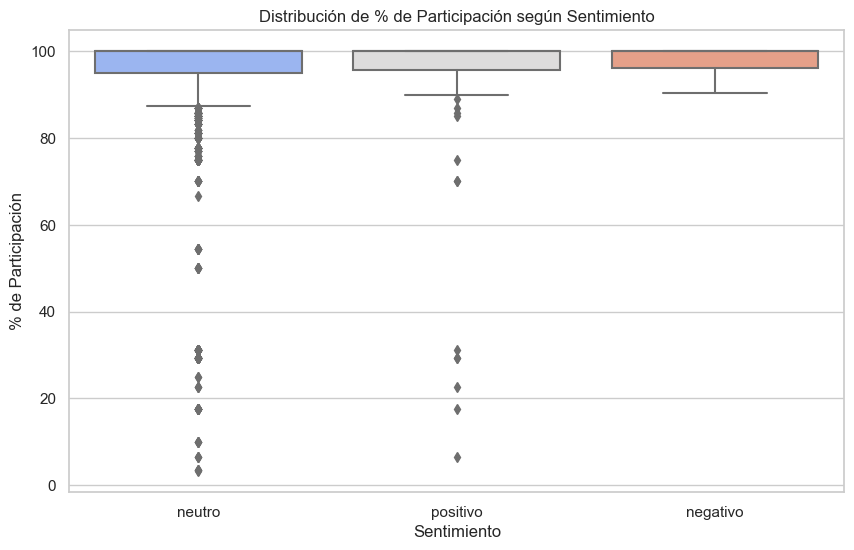

In [59]:
# Gráfico de dispersión para ver cómo el '% de participación' se relaciona con los sentimientos
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentimiento', y='% de participación', data=data, palette='coolwarm')
plt.title('Distribución de % de Participación según Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('% de Participación')
plt.show()

In [60]:
### CLUSTERIZACIÓN DE TEXTOS ##

In [61]:
# 1. Verificar datos cargados
print(data.head())
print(data.info())

   Id Instructor Grado Académico Catálogo     Curso  Nº Clase  \
0   1.000096e+09            PREG   PS0301  131708.0    6462.0   
1   1.000096e+09            PREG   PS0301  131708.0    1383.0   
2   1.000096e+09            PREG   HL0555  131708.0    1383.0   
3   1.000363e+09            PREG   PS0302  125596.0    1384.0   
4   1.000005e+09            PREG   PS0302  125596.0    1384.0   

        Nombre Catalogo Modo de Enseñanza Fecha Inicio real Fecha Fin real  \
0  Psicología General I        presencial        2024-01-24     2024-05-22   
1  Psicología General I        presencial        2024-01-24     2024-05-22   
2  Psicología General I        presencial        2024-01-24     2024-05-22   
3  Psicología General I        presencial        2024-01-24     2024-05-20   
4  Psicología General I        presencial        2024-01-22     2024-05-20   

  Centro de Costos  ...  Nota final por clase  \
0        psicologa  ...                  4.39   
1        psicologa  ...                  5

In [62]:
# Mapear valores de sentimiento a números
sentimiento_map = {
    "positivo": 1,
    "neutro": 0,
    "negativo": -1
}

In [63]:
# Reemplazar valores de sentimiento por números
data['sentimiento_numerico'] = data['sentimiento'].map(sentimiento_map)

In [64]:
# Verificar si hay valores no mapeados
if data['sentimiento_numerico'].isnull().any():
    print("Advertencia: Hay valores de sentimiento que no se han mapeado correctamente.")
    print(data.loc[data['sentimiento_numerico'].isnull(), 'sentimiento'].unique())


In [65]:
# Normalizar los valores numéricos de sentimiento
data['sentimiento_normalizado'] = (data['sentimiento_numerico'] - data['sentimiento_numerico'].mean()) / data['sentimiento_numerico'].std()

In [66]:
# 1. Selección de las columnas de interés
numerical_columns = ['Nota final por curso','sentimiento_normalizado']
categorical_columns = ['Grado Académico', 'Nombre Catalogo', 'Modo de Enseñanza', 'Centro de Costos', 'Pregunta']

In [67]:
# 2. Preprocesamiento: Categóricas con OneHotEncoding y Numéricas con escalado
# Usamos ColumnTransformer para aplicar diferentes transformaciones a las columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

In [68]:
# 3. Crear un pipeline que primero aplica el preprocesamiento y luego la clusterización
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [69]:
# 4. Transformar los datos
data_preprocessed = pipeline.fit_transform(data)

# Convertimos la matriz dispersa a densa
data_preprocessed_dense = data_preprocessed.toarray()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_k

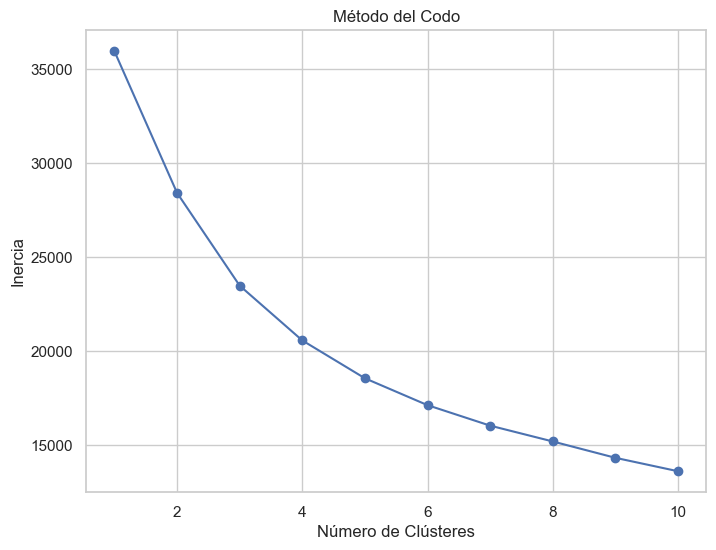

In [70]:
# 5. Método del Codo para determinar el número óptimo de clústeres
inertia = []
range_n_clusters = range(1, 11)  # Probar con diferentes valores de k (de 1 a 10)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_preprocessed_dense)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.show()

In [71]:
# A continuación, supongamos que determinamos que el número óptimo de clústeres es, por ejemplo, 4.
optimal_clusters = 4

# 6. Aplicamos KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_preprocessed_dense)

# Mostrar las primeras filas del DataFrame con la nueva columna de clústeres
print(data.head())

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Id Instructor Grado Académico Catálogo     Curso  Nº Clase  \
0   1.000096e+09            PREG   PS0301  131708.0    6462.0   
1   1.000096e+09            PREG   PS0301  131708.0    1383.0   
2   1.000096e+09            PREG   HL0555  131708.0    1383.0   
3   1.000363e+09            PREG   PS0302  125596.0    1384.0   
4   1.000005e+09            PREG   PS0302  125596.0    1384.0   

        Nombre Catalogo Modo de Enseñanza Fecha Inicio real Fecha Fin real  \
0  Psicología General I        presencial        2024-01-24     2024-05-22   
1  Psicología General I        presencial        2024-01-24     2024-05-22   
2  Psicología General I        presencial        2024-01-24     2024-05-22   
3  Psicología General I        presencial        2024-01-24     2024-05-20   
4  Psicología General I        presencial        2024-01-22     2024-05-20   

  Centro de Costos  ...                                        Comentarios  \
0        psicologa  ...                           la practica 

In [72]:
for i in range(4):
    print(f"\nCluster {i+1}:")
    print(data[data['Cluster'] == i]['sentimiento'].head(5))


Cluster 1:
3    neutro
4    neutro
5    neutro
6    neutro
7    neutro
Name: sentimiento, dtype: object

Cluster 2:
0     neutro
1     neutro
2     neutro
21    neutro
22    neutro
Name: sentimiento, dtype: object

Cluster 3:
48     positivo
129    positivo
154    positivo
240    positivo
245    positivo
Name: sentimiento, dtype: object

Cluster 4:
13    neutro
14    neutro
15    neutro
16    neutro
20    neutro
Name: sentimiento, dtype: object


In [73]:
####DASBOARD#####

In [74]:
# 1. Cargar y preparar los datos
# Suponemos que ya tienes el DataFrame 'data' con las columnas relevantes: Cluster y sentimiento
# Si el DataFrame contiene NaNs, podrías querer hacer una limpieza aquí.
data = data.copy()

In [75]:

# 2. Crear el dashboard de Dash
app = dash.Dash(__name__)

# Layout del Dashboard
app.layout = html.Div([
    # Título
    html.H1("Análisis Interactivo de Segmentación y Sentimiento"),
    
    # Filtro para seleccionar el Cluster
    html.Label("Selecciona un Cluster:"),
    dcc.Dropdown(
        id='cluster-dropdown',
        options=[{'label': f'Cluster {i}', 'value': i} for i in range(data['Cluster'].nunique())],
        value=0,  # Valor por defecto (cluster 0)
        multi=False
    ),
    
    # Gráfico 1: Distribución de las notas finales por curso según el clúster
    html.Div([
        dcc.Graph(id='nota-final-curso')
    ]),
    
    # Gráfico 2: Sentimiento promedio por clúster
    html.Div([
        dcc.Graph(id='sentimiento-promedio')
    ]),
    
    # Gráfico 3: Relación entre el sentimiento y las notas finales por curso
    html.Div([
        dcc.Graph(id='sentimiento-vs-nota')
    ]),
    
    # Gráfico 4: Distribución de las variables categóricas
    html.Div([
        dcc.Graph(id='distribucion-categoricas')
    ])
])

# Callback para actualizar los gráficos según el clúster seleccionado
@app.callback(
    [Output('nota-final-curso', 'figure'),
     Output('sentimiento-promedio', 'figure'),
     Output('sentimiento-vs-nota', 'figure'),
     Output('distribucion-categoricas', 'figure')],
    [Input('cluster-dropdown', 'value')]
)
def update_graphs(selected_cluster):
    # Filtrar los datos por el cluster seleccionado
    filtered_data = data[data['Cluster'] == selected_cluster]

    # 1. Gráfico: Distribución de las notas finales por curso según el clúster
    fig1 = px.histogram(filtered_data, x='Nota final por curso', nbins=20, title=f'Distribución de las Notas Finales por Curso (Cluster {selected_cluster})')
    
    # 2. Gráfico: Sentimiento promedio por clúster
    fig2 = px.box(filtered_data, y='sentimiento', title=f'Sentimiento Promedio por Cluster {selected_cluster}')
    
    # 3. Gráfico: Relación entre el sentimiento y las notas finales por curso
    fig3 = px.scatter(filtered_data, x='Nota final por curso', y='sentimiento', 
                      title=f'Relación entre Sentimiento y Nota Final por Curso (Cluster {selected_cluster})')

    # 4. Gráfico: Distribución de las variables categóricas (Grado Académico, Modo de Enseñanza, etc.)
    fig4 = px.histogram(filtered_data, x='Grado Académico', color='Modo de Enseñanza', 
                         title=f'Distribución por Grado Académico y Modo de Enseñanza (Cluster {selected_cluster})')

    return fig1, fig2, fig3, fig4

# Ejecutar el servidor
if __name__ == '__main__':
    app.run_server(debug=True)
